# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [6]:
# use data from March to May

In [7]:
import pandas as pd

In [8]:
# Read in the customer data
customer_data = pd.read_csv('../Data/maven_music_customers.csv')
customer_data.head(5)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [9]:
# Read in the listening history
listening_history = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=0)
listening_history.head(5)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [10]:
# Hint: Where might you find listening history data beyond the ID's?
# other sheets in the excel file

In [11]:
# Read in the audio data
audio_data = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=1)
audio_data.head(5)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [12]:
# Read in the session data
session_data = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=2)
session_data.head(5)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [16]:
# data types are good in listening_history, audio_data, session_data

In [17]:
customer_data

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,3/20/23,NaN,$2.99,NaN,6/3/23
6,5581,Reed Sharp,Email: sharp.tunes@email.com,3/21/23,Premium (No Ads),$9.99,NaN,NaN
7,5759,Carol Kingbird,Email: songbird.carol@email.com,3/22/23,Premium (No Ads),$9.99,NaN,6/2/23
8,5761,Sonata Nash,Email: musical.sonata@email.com,3/28/23,Premium (No Ads),$9.99,NaN,NaN
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,3/28/23,Basic (Ads),$2.99,NaN,NaN


In [18]:
# Check the data types
customer_data.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [19]:
# Convert objects to numeric and datetime fields

In [20]:
# convert object to datetime (Member Since)
customer_data['Member Since'] = pd.to_datetime(customer_data['Member Since'])
customer_data['Member Since'].head()

/var/folders/5y/6yb3w76x0d1ch03svnwhtb5r0000gn/T/ipykernel_30701/1047464808.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data['Member Since'] = pd.to_datetime(customer_data['Member Since'])


0   2023-03-13
1   2023-03-13
2   2023-03-13
3   2023-03-20
4   2023-03-20
Name: Member Since, dtype: datetime64[ns]

In [21]:
customer_data.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate            object
Discount?                    object
Cancellation Date            object
dtype: object

In [22]:
# convert object to datetime (Cancellation Date)
customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'])
customer_data['Cancellation Date'].head()

/var/folders/5y/6yb3w76x0d1ch03svnwhtb5r0000gn/T/ipykernel_30701/1964715760.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'])


0          NaT
1          NaT
2   2023-06-01
3          NaT
4          NaT
Name: Cancellation Date, dtype: datetime64[ns]

In [23]:
customer_data.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate            object
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [24]:
# convert object to numeric (Subscription Rate)
customer_data['Subscription Rate'] = pd.to_numeric(customer_data['Subscription Rate'].str.replace('$', ''))
customer_data['Subscription Rate'].head()

0    2.99
1    2.99
2    2.99
3    2.99
4    2.99
Name: Subscription Rate, dtype: float64

In [25]:
customer_data.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [29]:
# Look for NaN values in the data
customer_data[customer_data.isna().any(axis=1)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [30]:
# no NaN values in listening_history, audio_data, session_data

In [31]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [32]:
customer_data.shape

(30, 8)

In [33]:
# fill missing values in Subscription Plan, all NaN values in Subscription Plan are 2.99 due to Basic Plan

In [34]:
# check unique Subscription Rates
customer_data[['Subscription Rate', 'Subscription Plan']].drop_duplicates()

,Subscription Rate,Subscription Plan
0,2.99,Basic (Ads)
1,2.99,NaN
6,9.99,Premium (No Ads)
15,99.99,Premium (No Ads)
21,7.99,Premium (No Ads)


In [35]:
customer_data['Subscription Plan'].value_counts()

Subscription Plan
Premium (No Ads)    13
Basic (Ads)         12
Name: count, dtype: int64

In [36]:
customer_data['Subscription Plan'] = customer_data['Subscription Plan'].fillna('Basic (Ads)')
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  30 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [37]:
customer_data[customer_data.isna().any(axis=1)] # find missing values after updating

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [38]:
# fill missing values in Discount?, all NaN values in Discount? are No

In [39]:
customer_data['Discount?'].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [40]:
customer_data['Discount?'] = customer_data['Discount?'].fillna('No')
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  30 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          30 non-null     object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [41]:
# better convert Discount? to numeric (since yes or no)
import numpy as np

customer_data['Discount?'] = np.where(customer_data['Discount?'] == 'Yes', 1, 0)
customer_data['Discount?']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    0
25    1
26    1
27    0
28    1
29    1
Name: Discount?, dtype: int64

In [42]:
customer_data[customer_data.isna().any(axis=1)] # find missing values after updating

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT
10,5826,Chord Hayes,Email: harmonic.chord@email.com,2023-03-28,Basic (Ads),2.99,0,NaT
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,Basic (Ads),2.99,0,NaT
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT


In [43]:
# NaT in Cancellation Date indicate no cancellation date, leave it as it is

#### ii. Inconsistent Text & Typos

In [45]:
# Look for inconsistent text & typos

In [46]:
customer_data.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.430183,NaN


In [47]:
# check in Subscription Rate
customer_data['Subscription Rate'].value_counts()

Subscription Rate
2.99     17
7.99      7
9.99      5
99.99     1
Name: count, dtype: int64

In [48]:
# return rows that have Premium (No Ads) as Subscription Plan
customer_data[customer_data['Subscription Plan'].isin(['Premium (No Ads)'])]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02
21,6822,Kiki Keys,Email: kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT
22,6824,Greta Groove,Email: groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02
23,7087,Harmony Heart,Email: heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02
25,7224,Melody Fitzgerald,Email: fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01


In [49]:
customer_data[customer_data['Subscription Rate'] > 7.99] # change the value 99.99

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [50]:
customer_data.loc[15, 'Subscription Rate'] = 9.99
customer_data['Subscription Rate'].value_counts()

Subscription Rate
2.99    17
7.99     7
9.99     6
Name: count, dtype: int64

In [51]:
customer_data.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,0.430183,NaN


In [52]:
# check date range of customers
customer_data['Member Since'].max()

Timestamp('2023-05-16 00:00:00')

In [53]:
# Look at listening_history (looks good)
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [54]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [55]:
listening_history['Audio Type'].value_counts()

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

In [56]:
# Look at session_data (looks good)
session_data.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [57]:
session_data.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


In [58]:
# Look at audio_data
audio_data.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [59]:
audio_data.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [60]:
audio_data['ID'].value_counts()

ID
Song-101       1
Song-110       1
Podcast-204    1
Podcast-203    1
Podcast-202    1
Podcast-201    1
Song-112       1
Song-111       1
Song-109       1
Song-102       1
Song-108       1
Song-107       1
Song-106       1
Song-105       1
Song-104       1
Song-103       1
Podcast-205    1
Name: count, dtype: int64

In [61]:
audio_data['Name'].value_counts()

Name
Dance All Night                1
Boss Moves                     1
Crime Chronicles               1
The Comedian's Corner          1
Laugh Out Loudcast             1
Jokes on Jokes                 1
Midnight Blues                 1
Moonlit Serenade               1
Rise Above                     1
Unbreakable Beat               1
Chase the Dream                1
Dirt Road Romance              1
My Old Dog and My True Love    1
Pop Rocks                      1
Glowing Hearts                 1
Sunset Boulevard               1
Investigating Darkness         1
Name: count, dtype: int64

In [62]:
audio_data.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [63]:
audio_data['Genre'].value_counts() # Pop and Pop Music are same

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [64]:
audio_data[audio_data['Genre'].isin(['Pop', 'Pop Music'])]

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [65]:
audio_data['Genre'] = np.where(audio_data['Genre'] == 'Pop Music', 'Pop', audio_data['Genre'])

In [66]:
audio_data['Genre'].value_counts() # Pop and Pop Music are same

Genre
Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [67]:
# Look at log in time range
session_data['Session Log In Time'].max() # makes sense for the max timestamp to be at end of May

Timestamp('2023-05-31 06:03:00')

#### iii. Duplicate Rows

In [69]:
# Look for duplicate rows
listening_history[listening_history.duplicated()] # no duplicate rows in listening_history

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [70]:
# Look for duplicate rows
audio_data[audio_data.duplicated()] # no duplicate rows in audio_data

,ID,Name,Genre,Popularity


In [71]:
# Look for duplicate rows
session_data[session_data.duplicated()] # no duplicate rows in session_data

,Session ID,Session Log In Time


In [72]:
customer_data[customer_data.duplicated()] # no duplicate rows in customer_data

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


#### iv. Outliers

In [74]:
# Look for outliers
customer_data.describe() # looks good after fixing the 99.99

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,0.430183,NaN


In [75]:
listening_history.describe() # looks good

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [76]:
audio_data.describe() # looks good

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [77]:
session_data.describe() # looks good

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [80]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [81]:
# Create a 'Cancelled' column
customer_data['Cancelled'] = np.where(customer_data['Cancellation Date'].isna(), 0, 1)
customer_data

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


In [82]:
# Create an updated 'Email' column without the Email: portion
customer_data['Email'] = customer_data['Email'].str.replace('Email:', '')
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [85]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [86]:
# look at customers who cancelled
customer_data[customer_data['Cancellation Date'].notna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [87]:
# How long were customers members before they cancelled?
(customer_data['Cancellation Date'] - customer_data['Member Since']).mean() # average is 1.5 months

Timedelta('46 days 07:23:04.615384615')

In [88]:
# Cancellation rate for those who had a discount
yes_discount = customer_data[customer_data['Discount?'] == 1]
yes_discount

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [89]:
yes_discount['Cancelled'].sum() / yes_discount['Discount?'].count()

0.8571428571428571

In [90]:
# Cancellation rate for those who did not have a discount
no_discount = customer_data[customer_data['Discount?'] == 0]
no_discount.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [91]:
no_discount['Cancelled'].sum() / no_discount['Discount?'].count()

0.30434782608695654

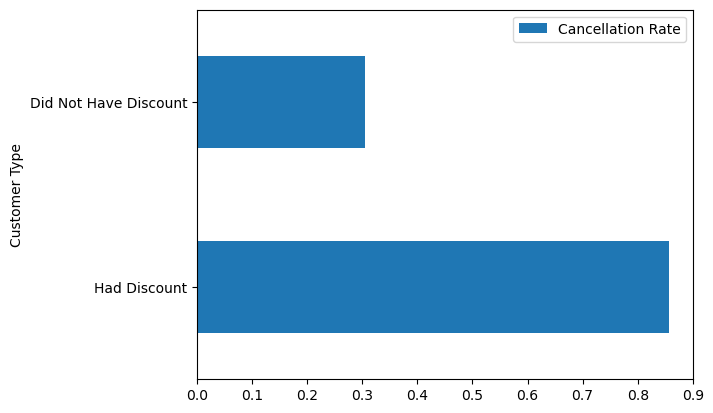

In [92]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([['Had Discount', 0.8571428571428571], 
              ['Did Not Have Discount', 0.30434782608695654]],
            columns=['Customer Type', 'Cancellation Rate']).plot.barh(x='Customer Type', y='Cancellation Rate');

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [94]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [95]:
audio_data.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52


In [96]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [97]:
session_data.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [98]:
audio_data.ID.str.split('-')

0        [Song, 101]
1        [Song, 102]
2        [Song, 103]
3        [Song, 104]
4        [Song, 105]
5        [Song, 106]
6        [Song, 107]
7        [Song, 108]
8        [Song, 109]
9        [Song, 110]
10       [Song, 111]
11       [Song, 112]
12    [Podcast, 201]
13    [Podcast, 202]
14    [Podcast, 203]
15    [Podcast, 204]
16    [Podcast, 205]
Name: ID, dtype: object

In [99]:
audio_data.ID.str.split('-').tolist()

[['Song', '101'],
 ['Song', '102'],
 ['Song', '103'],
 ['Song', '104'],
 ['Song', '105'],
 ['Song', '106'],
 ['Song', '107'],
 ['Song', '108'],
 ['Song', '109'],
 ['Song', '110'],
 ['Song', '111'],
 ['Song', '112'],
 ['Podcast', '201'],
 ['Podcast', '202'],
 ['Podcast', '203'],
 ['Podcast', '204'],
 ['Podcast', '205']]

In [100]:
# Split the ID in the Audio so the column can be joined with other tables
audio_clean = pd.DataFrame(audio_data.ID.str.split('-').tolist()).rename(columns={0: 'Type', 1: 'Audio ID'})
audio_clean

,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105
5,Song,106
6,Song,107
7,Song,108
8,Song,109
9,Song,110


In [101]:
# Add the new fields to the original Audio table
audio_all = pd.concat([audio_clean, audio_data], axis=1)
audio_all

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52
5,Song,106,Song-106,My Old Dog and My True Love,Country,23
6,Song,107,Song-107,Dirt Road Romance,Country,30
7,Song,108,Song-108,Chase the Dream,Hip Hop,4
8,Song,109,Song-109,Rise Above,Hip Hop,9
9,Song,110,Song-110,Boss Moves,Hip Hop,28


In [102]:
# If you try to join on the Audio ID, you will get an error
# listening_history.merge(audio_all, how='left', on='Audio ID')

In [103]:
# Hint: Check the data type of Audio ID in the audio table
audio_all.dtypes # ID is an object

Type          object
Audio ID      object
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [104]:
listening_history.dtypes # ID must be numeric

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [105]:
audio_all['Audio ID'] = audio_all['Audio ID'].astype('int')
audio_all['Audio ID']

0     101
1     102
2     103
3     104
4     105
5     106
6     107
7     108
8     109
9     110
10    111
11    112
12    201
13    202
14    203
15    204
16    205
Name: Audio ID, dtype: int64

In [106]:
df = listening_history.merge(audio_all, how='left', on='Audio ID')
df

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song,Song-111,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Podcast,Podcast-201,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Song,Song-110,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Song,Song-108,Chase the Dream,Hip Hop,4


In [107]:
df[df['Customer ID'] == 5001] # look for unique session ids, during each session id, the customer can listen to multiple songs

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52
5,5001,100520,6,108,Song,Song,Song-108,Chase the Dream,Hip Hop,4
6,5001,100520,7,109,Song,Song,Song-109,Rise Above,Hip Hop,9
7,5001,100520,8,110,Song,Song,Song-110,Boss Moves,Hip Hop,28
8,5001,100520,9,101,Song,Song,Song-101,Dance All Night,Pop,1
9,5001,100522,1,105,Song,Song,Song-105,Pop Rocks,Pop,52


In [108]:
df.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

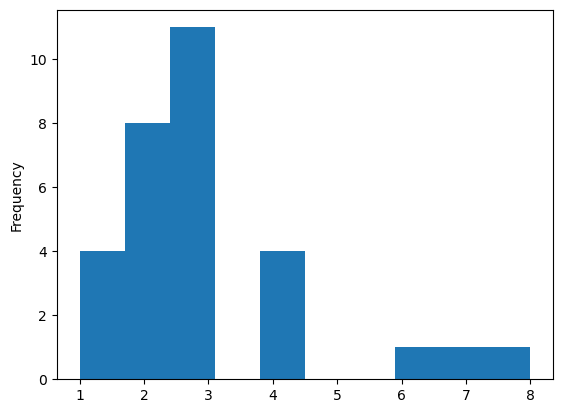

In [109]:
# The number of listening sessions that each customer had in the past 3 months
# groupby customer and find the no of unique sessions for each customer, look for unique sessions IDs
df.groupby('Customer ID')['Session ID'].nunique().plot.hist(); # most of the customers have 2 or 3 listening sessions

In [110]:
# The most popular genres that customers listened to
df['Genre'].value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [113]:
# Create a dataframe ready for modeling
model_df = customer_data[['Customer ID', 'Cancelled', 'Discount?']]
model_df

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0
5,5404,1,0
6,5581,0,0
7,5759,1,0
8,5761,0,0
9,5763,0,0


In [114]:
model_df.dtypes

Customer ID    int64
Cancelled      int64
Discount?      int64
dtype: object

In [115]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer ID  30 non-null     int64
 1   Cancelled    30 non-null     int64
 2   Discount?    30 non-null     int64
dtypes: int64(3)
memory usage: 852.0 bytes


In [116]:
# Calculate the number of listening sessions for each customer
pd.DataFrame(df.groupby('Customer ID')['Session ID'].nunique())

,Session ID
Customer ID,
5001,8
5002,4
5004,1
5267,7
5338,4
5404,1
5581,3
5759,2
5761,3


In [117]:
number_of_sessions = df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [118]:
model_df = model_df.merge(number_of_sessions, how='left', on='Customer ID')
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [119]:
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [120]:
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52


In [121]:
# Percent pop (use dummy variables, text fields to numeric fields)
genre_dummies = pd.get_dummies(df.Genre).astype('int')
genre_dummies.head()

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [122]:
genres = pd.concat([df['Customer ID'], genre_dummies], axis=1)
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0


In [123]:
# group by customer
genres = genres.groupby('Customer ID').sum()
genres.head()

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
Customer ID,,,,,,
5001,0,0,26,0,34,0
5002,0,22,0,0,0,0
5004,0,0,0,0,9,0
5267,0,0,22,0,23,0
5338,0,18,0,0,0,0


In [124]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [125]:
listening_history.groupby('Customer ID')['Audio ID'].count()

Customer ID
5001    60
5002    22
5004     9
5267    45
5338    18
5404     8
5581     5
5759    15
5761     5
5763    31
5826    17
5827     7
6029    12
6092    10
6163     4
6229    13
6406     9
6584    27
6586    22
6588    10
6821    21
6822    15
6824    31
7087    11
7158    13
7224    29
7401    11
7579     9
7581    14
7583     2
Name: Audio ID, dtype: int64

In [126]:
df.groupby('Customer ID')['Genre'].count()

Customer ID
5001    60
5002    22
5004     9
5267    45
5338    18
5404     8
5581     5
5759    15
5761     5
5763    31
5826    17
5827     7
6029    12
6092    10
6163     4
6229    13
6406     9
6584    27
6586    22
6588    10
6821    21
6822    15
6824    31
7087    11
7158    13
7224    29
7401    11
7579     9
7581    14
7583     2
Name: Genre, dtype: int64

In [127]:
total_audio = df.groupby('Customer ID')['Genre'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [128]:
# in order to make calculations, all columns must be in the same table
df_audio = genres.merge(total_audio, how='left', on='Customer ID')
df_audio.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [129]:
model_df['Percent of Pop'] = (df_audio['Pop'] / df_audio['Total Audio']) * 100
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent of Pop
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,1,0,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [130]:
# Percent podcasts
df[df['Type'] == 'Podcast'] # True Crime & Comedy are podcasts

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
37,5581,100538,1,204,Podcast,Podcast,Podcast-204,Crime Chronicles,True Crime,4
62,6092,100579,1,202,Podcast,Podcast,Podcast-202,Laugh Out Loudcast,Comedy,8
63,6092,100579,2,202,Podcast,Podcast,Podcast-202,Laugh Out Loudcast,Comedy,8
67,5581,100589,1,205,Podcast,Podcast,Podcast-205,Investigating Darkness,True Crime,17
68,5581,100589,2,205,Podcast,Podcast,Podcast-205,Investigating Darkness,True Crime,17
122,7087,101923,1,201,Podcast,Podcast,Podcast-201,Jokes on Jokes,Comedy,2
123,7087,101923,2,202,Podcast,Podcast,Podcast-202,Laugh Out Loudcast,Comedy,8
132,5581,102092,1,204,Podcast,Podcast,Podcast-204,Crime Chronicles,True Crime,4
133,5581,102092,2,204,Podcast,Podcast,Podcast-204,Crime Chronicles,True Crime,4
149,6092,102139,4,203,Podcast,Podcast,Podcast-203,The Comedian's Corner,Comedy,20


In [131]:
model_df['Percent of Podcast'] = ((df_audio['Comedy'] + df_audio['True Crime']) / df_audio['Total Audio']) * 100
model_df

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent of Pop,Percent of Podcast
0,5001,0,0,8,56.666667,0.000000
1,5002,0,0,4,0.000000,0.000000
2,5004,1,0,1,100.000000,0.000000
3,5267,0,0,7,51.111111,0.000000
4,5338,0,0,4,0.000000,0.000000
5,5404,1,0,1,100.000000,0.000000
6,5581,0,0,3,0.000000,100.000000
7,5759,1,0,2,100.000000,0.000000
8,5761,0,0,3,0.000000,100.000000
9,5763,0,0,6,64.516129,0.000000


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

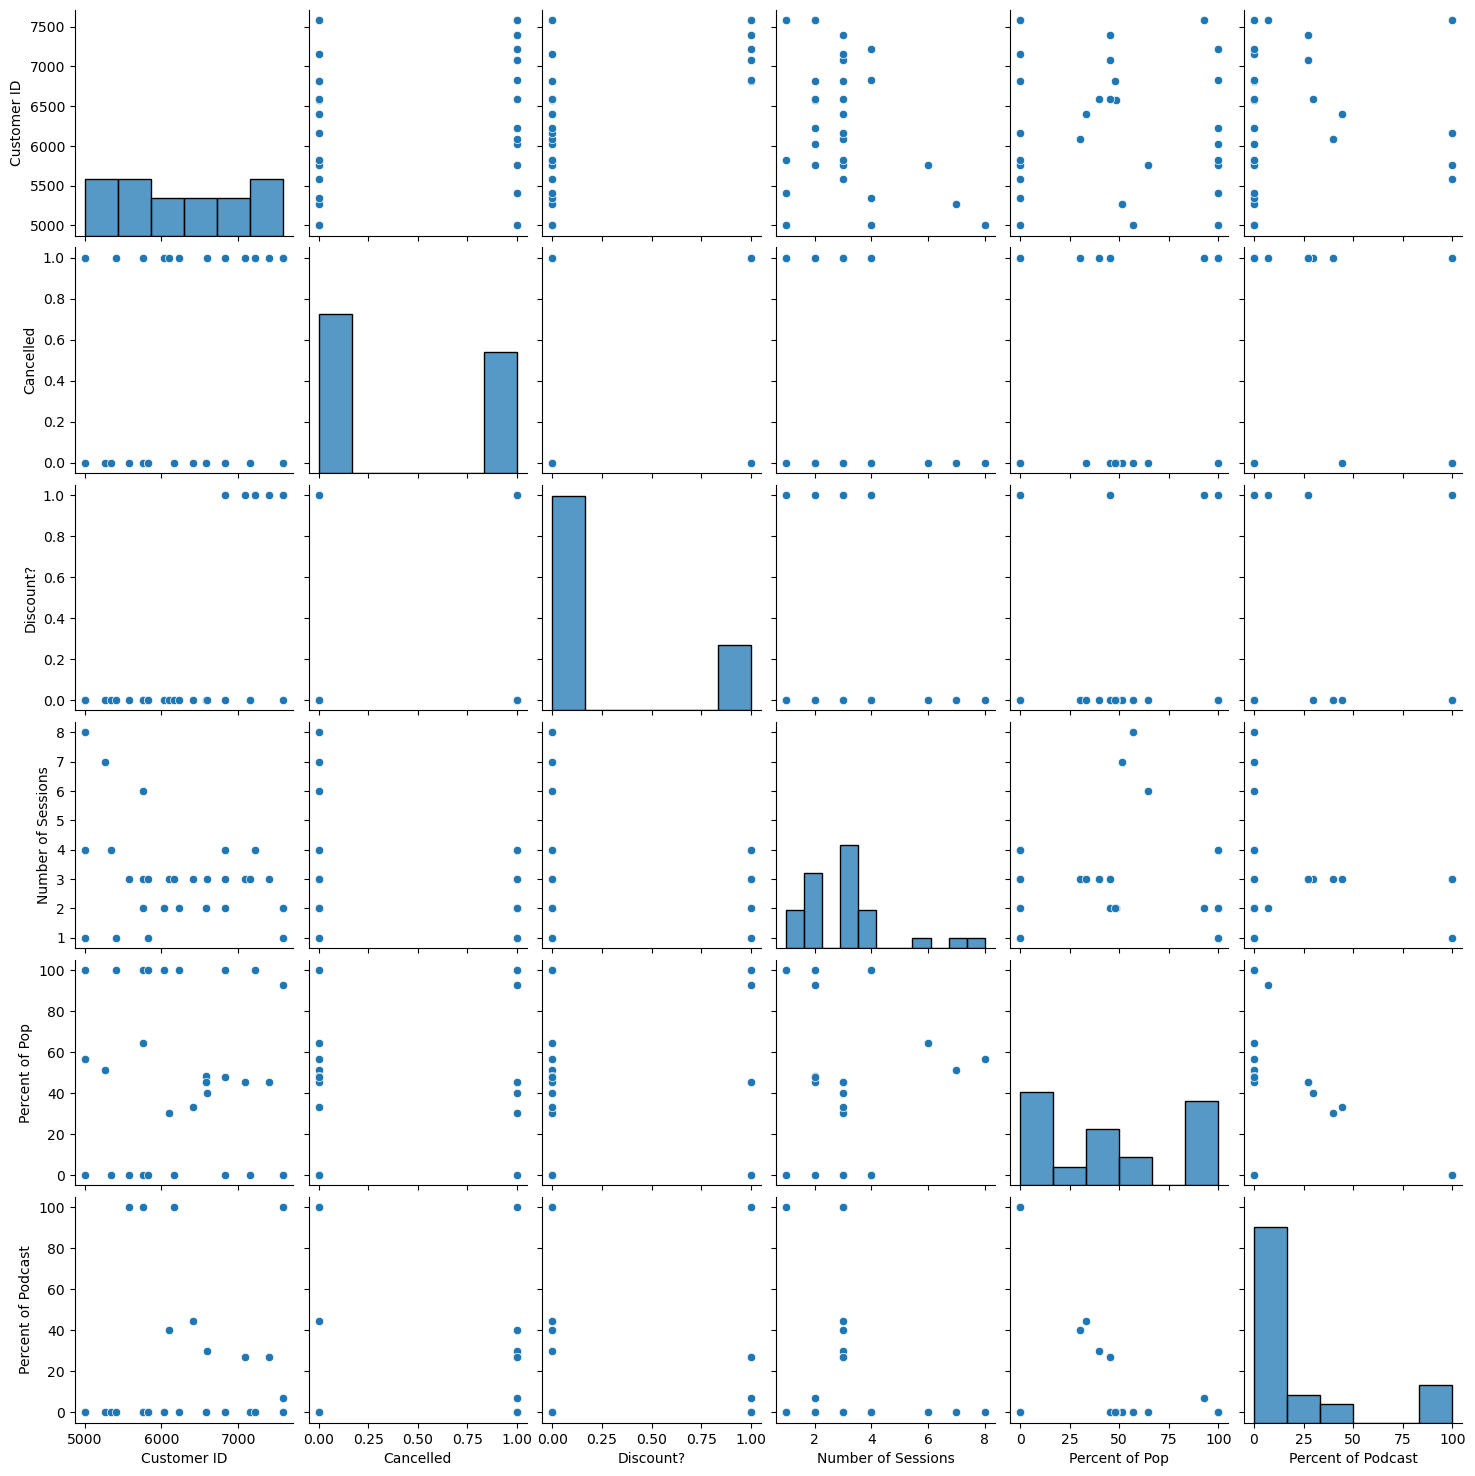

In [133]:
import seaborn as sns
sns.pairplot(model_df);

In [134]:
# look at the correlations
model_df.corr()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent of Pop,Percent of Podcast
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.585630,-0.035414
Discount?,0.648514,0.471825,1.000000,-0.048877,0.112675,0.062938
Number of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131156,-0.125459
Percent of Pop,-0.076129,0.585630,0.112675,-0.131156,1.000000,-0.487193
Percent of Podcast,0.083083,-0.035414,0.062938,-0.125459,-0.487193,1.000000


In [135]:
# Discount is correlated with cancellation
# More number of listening sessions, fewer cancellations, active users are less likely to cancel
# More pop music, more cancellations
# Podcast listening history is unrelated to cancellation